<a href="https://colab.research.google.com/github/timidsurgeon/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

# Warm-Up

Good evening DSPT2! Here's what we'll be doing for your warmup today.

https://alshams.github.io/responsibledata/bias-in-data-viz/

1. Read this :this: blog post
2. Go out on the internet and find a visualization that illustrates at least one of the biases mentioned in the article.
3. Drop a link to the visualization in Slack.
4. Show up at 6:30 Pacific in zoom and talk about your misleading visualization!

Presenting too much data
Sometimes, showing the big picture can make it hard to identify salient data or stories.

In Figure 2, the sheer number of lines makes it hard to focus on any one data point or trend. If the designer wanted to obscure some bad news, burying it in a massive amount of information could accomplish that—but it also makes the data visualization essentially worthless.

Figure 2: The number of lines in this data visualization makes it hard to isolate any one fact or trend

In other cases, the trends that appear when an entire data set is visualized are the opposite of trends that appear when subsets of that data are studied separately. This phenomenon, known as Simpson’s Paradox, is explained in Cathy O’Neil’s Weapons of Math Destruction using a national report on school performance as an example. The report, A Nation at Risk, which was the basis of wide-ranging public policy, stated that nationwide, high schoolers’ SAT scores had declined.

Examination of the data revealed that, while this was true in a big-picture sense, the period of data covered an era with tremendous growth in the number and range of students taking the exam; universities were admitting more minority and lower-income students, vastly increasing the numbers of these students taking the exam. When each cohort of students—analyzed according to income groups—was examined, the data actually showed increases in the average scores of each group.

When learners will need both a big-picture and a detailed visualization of data, the designer should consider creating a series of data visualizations. News media often do this with large data stories, showing a national map, for example with broad representations of data by region or state, then a series of more narrowly focused visualizations that highlight important trends, outliers, or other information.



## Website URL

https://learningsolutionsmag.com/articles/misleading-data-visualizations-can-confuse-deceive-learners

## Image URL

https://learningsolutionsmag.com/sites/default/files/inline-images/7441_Figure2.png

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [81]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-07-20 21:19:25--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip.1’

LoanStats_2019Q1.cs     [    <=>             ]  19.30M   899KB/s    in 22s     

2019-07-20 21:19:48 (891 KB/s) - ‘LoanStats_2019Q1.csv.zip.1’ saved [20240936]



In [82]:
!ls

LoanStats_2019Q1.csv	  LoanStats_2019Q1.csv.zip.1
LoanStats_2019Q1.csv.zip  sample_data


In [83]:
!unzip LoanStats_2019Q1.csv.zip

Archive:  LoanStats_2019Q1.csv.zip
replace LoanStats_2019Q1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2019Q1.csv    


In [84]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [85]:
!tail LoanStats_2019Q1.csv

"","","5000","5000","5000"," 36 months"," 13.56%","169.83","C","C1","","n/a","MORTGAGE","48000","Not Verified","Jan-2019","Current","n","","","home_improvement","Home improvement","338xx","FL","8.28","2","May-2006","0","11","","8","0","3846","13.6%","21","w","4420.40","4420.40","841.62","841.62","579.60","262.02","0.0","0.0","0.0","Jun-2019","169.83","Jul-2019","Jun-2019","0","","1","Individual","","","","0","0","35666","0","1","0","0","49","5336","47","0","2","0","23","28200","0","3","0","2","4458","","","0","0","99","151","13","13","1","","","","11","0","0","3","0","1","4","6","16","3","8","0","0","0","0","90.5","","0","0","88613","9182","0","11413","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","40000","40000","40000"," 36 months","  6.46%","1225.24","A","A1","President - North America","4 years","MORTGAGE","520000","Verified","Jan-2019","Current","n","","","credit_card","Credit card refinancing","752xx","TX","9.96","0","Se

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd 

In [87]:
df = pd.read_csv('LoanStats_2019Q1.csv.zip')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
print(df.shape)
df.head()

(115678, 1)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       20000     20000       20000            60 months  17.19%  499.1       C     C5        Front desk supervisor 6 years    RENT           47000      Source Verified     Mar-2019 Current     n          NaN NaN  debt_consolidation Debt consolidation      958xx    CA         14.02 0           Sep-2006         1              50                     NaN                    15       0       10687     19.7%      53        w                   19254.76  19254.76      1459.1      1459.10         745.24          713.86        0.0                0.0        0.0                     Jun-2019     499.1           Jul-2019     Jun-2019           0                          50                          1           Individual       NaN              NaN       NaN                       0              0            31546       3           2           1           2           10                 20859        97      4           9           5909       42       54300            6      1           3            11                   2103        23647          30      0                        0           150                100                  1                     1              0        5                    NaN                      3                     50                             3                     3              4               8           19        19        13            33            4                   15       0                0            0                  5                  98             12.5           

In [89]:
# skipping the first row for correct start point and also skipping the last two
# rows in the dataframe 
# stating engine as python gets rid of the warning 
df = pd.read_csv('LoanStats_2019Q1.csv.zip', skiprows=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,Jun-2019,499.10,Jul-2019,Jun-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,May-2019,424.26,Jul-2019,Jun-2019,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,9292.0,3231.0,82.5,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,134.36,67.97,0.00,0.0,0.0,May-2019,103.62,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,3781

In [90]:
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [91]:
df[df.loan_amnt.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(56), int64(52), object(36)
memory usage: 127.1+ MB


In [93]:
# transpose makes it easier to read the dataframe instead of having to scroll right
df.head().T

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,12000,3000,35000,5000
funded_amnt,20000,12000,3000,35000,5000
funded_amnt_inv,20000,12000,3000,35000,5000
term,60 months,36 months,36 months,36 months,36 months
int_rate,17.19%,16.40%,14.74%,15.57%,15.57%
installment,499.1,424.26,103.62,1223.08,174.73
grade,C,C,C,C,C
sub_grade,C5,C4,C2,C3,C3


In [0]:
# gets rid of the ... 
pd.options.display.max_columns = 150
pass
pd.options.display.max_rows = 150
pass

In [95]:
df.head().T

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,12000,3000,35000,5000
funded_amnt,20000,12000,3000,35000,5000
funded_amnt_inv,20000,12000,3000,35000,5000
term,60 months,36 months,36 months,36 months,36 months
int_rate,17.19%,16.40%,14.74%,15.57%,15.57%
installment,499.1,424.26,103.62,1223.08,174.73
grade,C,C,C,C,C
sub_grade,C5,C4,C2,C3,C3


## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [96]:
# returns only the data that is in int type 
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,115675.000000,115675.000000,115675.000000,115675.000000,1.156750e+05,0.0,0.0,115418.000000,115675.000000,115675.000000,49876.000000,13423.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.0,115675.0,115675.000000,115675.000000,24998.000000,115675.0,1.668100e+04,16681.000000,115675.0,115675.000000,1.156750e+05,115675.000000,115675.000000,115675.000000,115675.000000,112158.000000,1.156750e+05,98356.000000,115675.000000,115675.000000,115675.000000,115651.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115668.000000,114352.000000,114297.000000,115675.000000,115675.000000,112158.000000,115675.000000,115675.000000,115675.000000,115675.000000,114417.000000,22598.000000,101318.000000,32896.00000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,112529.0,115675.0,115675.000000,115675.000000,115675.000000,114346.000000,115675.000000,115675.0,1.156750e+05,1.156750e+05,115675.000000,1.156750e+05,16681.000000,16681.000000,16681.000000,16681.000000,16451.000000,16681.000000,16681.000000,16681.000000,16681.000000,4901.000000,1.0,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0
mean,NaN,NaN,16671.263021,16671.263021,16668.042144,481.083874,8.505333e+04,NaN,NaN,20.445427,0.227595,0.443069,36.654864,87.794830,11.723544,0.117484,17859.725835,23.121262,14769.657755,14766.934018,2526.362844,2525.758973,1880.341193,645.880945,0.140706,0.0,0.0,1026.634408,0.016693,46.419034,1.0,1.393034e+05,19.539382,0.0,176.482818,1.530888e+05,0.913776,2.790430,0.701145,1.586721,20.143360,3.763173e+04,67.932236,1.167806,2.463384,6395.217324,54.217058,41527.288360,1.119118,1.545710,1.877994,4.316672,14307.482752,16306.032531,49.817880,0.007469,3.038591,125.115747,176.763761,15.652777,8.732648,1.378561,26.151743,39.701080,7.663525,37.31706,0.436395,3.741967,5.544664,5.020324,7.205749,8.475159,8.301630,13.071761,5.501388,11.705909,0.0,0.0,0.058007,1.992349,94.919273,32.611930,0.117441,0.0,1.971531e+05,5.585600e+04,29185.391589,4.871611e+04,39336.440801,0.564535,1.647743,11.707931,55.987022,3.083148,12.661231,0.027277,

In [97]:
# if you pass in object it returns all data of all object types 
df.describe(include='object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,115675,115675,115675,115675,96157,104574,115675,115675,115675,115675,115675,115675,115675,115675,115675,115675,115546,115675,115445,110769,115673,115675,14624,16681,115675,1,1,1,1,1,1,1,115675,1,1,1
unique,2,53,7,33,39387,11,5,3,3,6,1,12,12,877,50,652,1055,2,7,3,7,2,3,577,2,1,1,1,1,1,1,1,2,1,1,1
top,36 months,8.19%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Jan-2019,Current,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2006,0%,w,Jun-2019,Jul-2019,Jun-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,INCOME_CURTAILMENT,ACTIVE,Jun-2019,Sep-2019,Jul-2019,In Grace Period,N,May-2019,ACTIVE,May-2019
freq,78429,11314,37060,11314,2037,34490,58578,54608,43584,109176,115675,63747,63747,1162,15902,1033,1054,101423,102101,110738,111240,98994,6395,150,115674,1,1,1,1,1,1,1,115674,1,1,1


In [98]:
df.grade.value_counts()

A    37060
B    33129
C    27277
D    14797
E     3364
F       31
G       17
Name: grade, dtype: int64

In [99]:
df.emp_length.value_counts()

10+ years    34490
< 1 year     15044
2 years       9695
3 years       8719
1 year        7919
5 years       7189
4 years       6777
6 years       4636
7 years       3913
8 years       3625
9 years       2567
Name: emp_length, dtype: int64

# Convert int_rate
### (Vectorized operation)

In [100]:
x = '12.5%'
float(x.strip('%'))

12.5

In [164]:
df = pd.read_csv('LoanStats_2019Q1.csv.zip', skiprows=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,Jun-2019,499.10,Jul-2019,Jun-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,May-2019,424.26,Jul-2019,Jun-2019,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,9292.0,3231.0,82.5,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,134.36,67.97,0.00,0.0,0.0,May-2019,103.62,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,3781

In [0]:
df['int_rate'] = df['int_rate'].str.strip('%').astype(float)

In [103]:
df['int_rate'].head()

0    17.19
1    16.40
2    14.74
3    15.57
4    15.57
Name: int_rate, dtype: float64

In [104]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,Jun-2019,499.10,Jul-2019,Jun-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,May-2019,424.26,Jul-2019,Jun-2019,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,9292.0,3231.0,82.5,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,134.36,67.97,0.00,0.0,0.0,May-2019,103.62,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,37816,0

# Convert `int_rate`
### (Using function)

Define a function to remove percent signs from strings and convert to floats

In [105]:
x

'12.5%'

In [0]:
def remove_percent_sign(string):
  '''This function takes a string as input, strips the trailing percent sign, 
  and returns float interest rate.'''
  return float(string.strip('%'))

In [107]:
remove_percent_sign(x)

12.5

In [108]:
type(remove_percent_sign(x))

float

Apply the function to the `int_rate` column

In [109]:
df['int_rate'] = df['int_rate'].apply(remove_percent_sign)
df['int_rate'].head()

AttributeError: ignored

In [110]:
df.int_rate.describe()

count    115675.000000
mean         12.720160
std           4.854991
min           6.000000
25%           8.190000
50%          11.800000
75%          15.570000
max          30.890000
Name: int_rate, dtype: float64

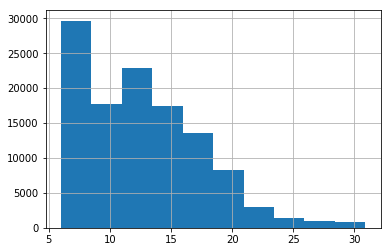

In [111]:
df.int_rate.hist();

### Clean `emp_title`

Look at top 20 titles

In [112]:
df.emp_title.value_counts().head(20)

Teacher                     2037
Manager                     1626
Registered Nurse             898
Driver                       857
Supervisor                   655
RN                           623
Sales                        586
Office Manager               574
Project Manager              540
General Manager              486
Owner                        449
Director                     374
Operations Manager           313
Engineer                     309
Truck Driver                 308
Sales Manager                288
Nurse                        281
Administrative Assistant     267
Supervisor                   260
Accountant                   259
Name: emp_title, dtype: int64

In [113]:
df.emp_title.value_counts().head(50)

Teacher                     2037
Manager                     1626
Registered Nurse             898
Driver                       857
Supervisor                   655
RN                           623
Sales                        586
Office Manager               574
Project Manager              540
General Manager              486
Owner                        449
Director                     374
Operations Manager           313
Engineer                     309
Truck Driver                 308
Sales Manager                288
Nurse                        281
Administrative Assistant     267
Supervisor                   260
Accountant                   259
Server                       258
Account Manager              254
manager                      246
President                    242
Technician                   240
Vice President               238
Police Officer               237
Attorney                     226
teacher                      225
Manager                      221
Truck driv

In [114]:
# shows NaN values as a category 
df.emp_title.value_counts(dropna=False)

NaN                                         19518
Teacher                                      2037
Manager                                      1626
Registered Nurse                              898
Driver                                        857
Supervisor                                    655
RN                                            623
Sales                                         586
Office Manager                                574
Project Manager                               540
General Manager                               486
Owner                                         449
Director                                      374
Operations Manager                            313
Engineer                                      309
Truck Driver                                  308
Sales Manager                                 288
Nurse                                         281
Administrative Assistant                      267
Supervisor                                    260


How often is `emp_title` null?

In [115]:
df.emp_title.isna().sum()

19518

In [116]:
df.emp_title.isna().sum() / len(df)

0.1687313594121461

In [117]:
df.emp_title.isna().sum() / df.shape[0]

0.1687313594121461

In [118]:
df.shape

(115675, 144)

## Clean the emp_title and handle missing values
- Capitalized 
- Strip spaces 
- Replace 'NaN' with missing 

In [0]:
import numpy as np

In [120]:
isinstance('dog', str)

True

In [121]:
isinstance(np.nan, str)

False

In [122]:
example = ['owner', 'Supervisor ', ' Project manager', np.nan]

def clean_emp_title(x):
  if isinstance(x, str):
    return x.strip().title()
  else:
    return 'Missing'
  
for ex in example:
  print(clean_emp_title(ex))
  
# this as a list comprehension 
[clean_emp_title(x) for x in example]

Owner
Supervisor
Project Manager
Missing


['Owner', 'Supervisor', 'Project Manager', 'Missing']

In [123]:
# same as above but as a list comprehension 
example = ['owner', 'Supervisor ', ' Project manager', np.nan]

def clean_emp_title(x):
  if isinstance(x, str):
    return x.strip().title()
  else:
    return 'Missing'

[clean_emp_title(x) for x in example]

['Owner', 'Supervisor', 'Project Manager', 'Missing']

In [124]:
df['emp_title'] = df['emp_title'].apply(clean_emp_title)
df['emp_title'].head(20)

0       Front Desk Supervisor
1          Executive Director
2              Office Manager
3               Store Manager
4                Area Manager
5                         Svp
6                 Vp Of Sales
7                       Sales
8                          Rn
9             Project Manager
10          Custom Applicator
11                 Av Manager
12    Human Resources Liaison
13                    Missing
14                      Agent
15            Sales/Marketing
16                        Ceo
17                  Route Rep
18                Maintenance
19        Executive Assistant
Name: emp_title, dtype: object

In [125]:
df.emp_title.nunique()

31429

In [126]:
df.emp_title.value_counts().head(10)

Missing             19518
Teacher              2465
Manager              2172
Registered Nurse     1306
Driver               1194
Supervisor           1109
Office Manager        834
Sales                 806
Truck Driver          767
General Manager       737
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [127]:
df['emp_title'].str.contains('Manager', case=False).head(10)

0    False
1    False
2     True
3     True
4     True
5    False
6    False
7    False
8    False
9     True
Name: emp_title, dtype: bool

In [128]:
df['emp_title'].iloc[0:10]

0    Front Desk Supervisor
1       Executive Director
2           Office Manager
3            Store Manager
4             Area Manager
5                      Svp
6              Vp Of Sales
7                    Sales
8                       Rn
9          Project Manager
Name: emp_title, dtype: object

In [129]:
df['emp_title_manager'] = df.emp_title.str.contains('Manager')
df['emp_title_manager'].value_counts()

False    99713
True     15962
Name: emp_title_manager, dtype: int64

In [130]:
df['int_rate'].groupby(df['emp_title_manager']).mean()

emp_title_manager
False    12.744184
True     12.570085
Name: int_rate, dtype: float64

In [131]:
df['int_rate'].groupby(df['emp_title_manager']).mean() / 100

emp_title_manager
False    0.127442
True     0.125701
Name: int_rate, dtype: float64

In [132]:
df.groupby('emp_title_manager').mean()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
emp_title_manager,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,NaN,NaN,16448.182534,16448.182534,16444.838186,12.744184,475.519424,83559.458416,NaN,NaN,20.592776,0.226560,0.442670,36.631389,87.613775,11.616850,0.117918,17586.025112,22.963947,14567.067655,14564.236669,2499.304451,2498.678031,1861.299217,637.864935,0.140299,0.0,0.0,1017.021710,0.016628,46.328798,1.0,137541.633416,19.541955,0.0,174.940589,150180.009959,0.909270,2.760693,0.693270,1.568742,20.403991,37305.27524,67.872938,1.164984,2.458085,6295.674406,54.015357,40994.239477,1.107388,1.541043,1.865033,4.286502,14109.133703,16102.276128,49.612016,0.007471,3.473048,124.802636,177.265412,15.688697,8.783699,1.360906,26.318597,39.703281,7.666162,37.277170,0.434377,3.703158,5.497257,4.965902,7.154273,8.401051,8.234242,13.010851,5.453832,11.598628,0.0,0.0,0.058448,1.978709,94.926925,32.464631,0.117868,0.0,193665.505140,55243.302488,28729.721100,48153.360555,38804.680792,0.570886,1.644383,11.685335,55.920828,3.072208,12.682351,0.028748,0.054105,39.140069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2839.0,65.0,18.0
True,NaN,NaN,18064.824270,18064.824270,18062.374702,12.570085,515.844428,94385.379918,NaN,NaN,19.526991,0.234056,0.445558,36.798941,88.957965,12.390051,0.114773,19569.506578,24.103997,16035.217625,16033.163865,2695.393888,2694.930881,1999.294491,695.956149,0.143250,0.0,0.0,1086.683964,0.017103,46.980358,1.0,152753.202790,19.519736,0.0,186.116965,171259.574427,0.941925,2.976193,0.750345,1.699035,18.535068,39671.02863,68.288965,1.185440,2.496492,7017.051873,55.476942,44857.190828,1.192394,1.574865,1.958965,4.505137,15546.462223,17573.604256,51.098597,0.007455,0.324583,127.047887,173.629996,15.428392,8.413733,1.488849,25.113209,39.687360,7.647246,37.565189,0.449004,3.984400,5.840809,5.360293,7.527315,8.938103,8.722591,13.452262,5.798459,12.376081,0.0,0.0,0.055256,2.077559,94.871470,33.528227,0.114773,0.0,218939.590465,59683.425636,32031.919058,52231.558827,43395.927536,0.516046,1.673395,11.880435,56.491562,3.166667,12.500000,0.016046,0.040373,40.067766,3.0,35.21,3.0,11.0,105.63,5636.06,5.9,NaN,NaN,NaN


In [133]:
df.groupby('emp_title_manager').int_rate.mean()

emp_title_manager
False    12.744184
True     12.570085
Name: int_rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [134]:
df['issue_d'].head().values

array(['Mar-2019', 'Mar-2019', 'Mar-2019', 'Mar-2019', 'Mar-2019'],
      dtype=object)

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [136]:
df['issue_d'].describe()

count                  115675
unique                      3
top       2019-01-01 00:00:00
freq                    43584
first     2019-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

In [137]:
df['issue_d'].iloc[0:5].dt.month

0    3
1    3
2    3
3    3
4    3
Name: issue_d, dtype: int64

In [138]:
df['issue_d'].iloc[0:5].dt.year

0    2019
1    2019
2    2019
3    2019
4    2019
Name: issue_d, dtype: int64

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [140]:
df['issue_month'].value_counts()

1    43584
3    36106
2    35985
Name: issue_month, dtype: int64

In [141]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_month
0,NaN,NaN,20000,20000,20000,60 months,17.19,499.10,C,C5,Front Desk Supervisor,6 years,RENT,47000.0,Source Verified,2019-03-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,Jun-2019,499.10,Jul-2019,Jun-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,3
1,NaN,NaN,12000,12000,12000,36 months,16.40,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,2019-03-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,May-2019,424.26,Jul-2019,Jun-2019,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,9292.0,3231.0,82.5,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,3
2,NaN,NaN,3000,3000,3000,36 months,14.74,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,2019-03-01,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,134.36,67.97,0.00,0.0,0.0,May-2019,103.62,Jul-2019

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [0]:
df['days_since_earliest_cr_line'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [144]:
df['days_since_earliest_cr_line'].describe()

count    115675.000000
mean       5972.244634
std        2904.216417
min        1124.000000
25%        4141.000000
50%        5358.000000
75%        7367.000000
max       27453.000000
Name: days_since_earliest_cr_line, dtype: float64

In [145]:
1124/365

3.0794520547945203

In [146]:
27453/365

75.21369863013699

In [147]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
  df[col] = pd.to_datetime(df[col])

In [149]:
df.describe(include='datetime')

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,115675,115675,115445,110769,115673
unique,3,652,7,3,7
top,2019-01-01 00:00:00,2006-08-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00
freq,43584,1033,102101,110738,111240
first,2019-01-01 00:00:00,1944-01-01 00:00:00,2019-01-01 00:00:00,2019-06-01 00:00:00,2018-12-01 00:00:00
last,2019-03-01 00:00:00,2016-02-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-06-01 00:00:00


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [150]:
df.term.value_counts()

 36 months    78429
 60 months    37246
Name: term, dtype: int64

In [151]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'emp_title_manager',
       'issue_month', 'days_since_earliest_cr_line'],
      dtype='object', length=147)

In [0]:
def remove_months_string(string):
  """ This function will remove the 'months' string from the term column data and
  returns just the int type """
  return int(string.strip('months'))

In [153]:
remove_months_string('60 months')

60

In [154]:
type(remove_months_string('60 months'))

int

In [155]:
df['term'] = df['term'].apply(remove_months_string)
df['term'].head()

0    60
1    36
2    36
3    36
4    36
Name: term, dtype: int64

In [228]:
df = pd.read_csv('LoanStats_2019Q1.csv.zip', skiprows=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,745.24,713.86,0.00,0.0,0.0,Jun-2019,499.10,Jul-2019,Jun-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,524.08,302.57,0.00,0.0,0.0,May-2019,424.26,Jul-2019,Jun-2019,0,30.0,1,Individual,NaN,NaN,NaN,0,0,176551,1,5,2,5,7.0,35115,65.0,3,6,4899,65.0,25600,4,0,3,12,9292.0,3231.0,82.5,0,0,316.0,269,5,5,2,12.0,58.0,7.0,29.0,1,6,8,6,9,10,13,23,8,19,0.0,0,0,6,80.6,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,134.36,67.97,0.00,0.0,0.0,May-2019,103.62,Jul-2019,Jun-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,3781

In [192]:
df.loan_status.value_counts()

Current               109176
Fully Paid              4730
Late (31-120 days)       795
In Grace Period          538
Late (16-30 days)        260
Charged Off              176
Name: loan_status, dtype: int64

In [219]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)

In [0]:
df['loan_status_is_great'] = df['loan_status'].apply(lambda x: 1 if x == 'Current' or x == 'Fully Paid' else 0)

In [253]:
df.loan_status_is_great.value_counts()

1    113906
0      1769
Name: loan_status_is_great, dtype: int64

In [259]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'loan_status_is_great'],
      dtype='object', length=145)

In [265]:
df['last_pymnt_d'].head().values

array(['Jun-2019', 'May-2019', 'May-2019', 'Jun-2019', 'May-2019'],
      dtype=object)

In [0]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)

In [267]:
df['last_pymnt_d'].describe()

count                  115445
unique                      7
top       2019-06-01 00:00:00
freq                   102101
first     2019-01-01 00:00:00
last      2019-07-01 00:00:00
Name: last_pymnt_d, dtype: object

In [268]:
df['last_pymnt_d'].iloc[0:5].dt.month

0    6
1    5
2    5
3    6
4    5
Name: last_pymnt_d, dtype: int64

In [0]:
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month

In [272]:
df['last_pymnt_d_month'].value_counts()

6.0    102101
5.0      9503
4.0      1581
3.0      1187
2.0       864
1.0       208
7.0         1
Name: last_pymnt_d_month, dtype: int64

In [273]:
df['last_pymnt_d'].iloc[0:5].dt.year

0    2019
1    2019
2    2019
3    2019
4    2019
Name: last_pymnt_d, dtype: int64

In [0]:
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year

In [275]:
df['last_pymnt_d_year'].value_counts()

2019.0    115445
Name: last_pymnt_d_year, dtype: int64

In [276]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'loan_status_is_great',
       'last_pymnt_d_month', 'last_pymnt_d_year'],
      dtype='object', length=147)

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01

# Link to lecture

https://youtu.be/Y39_6wZuv8A

# Link to orientation

https://www.youtube.com/watch?v=2sIK7wYkZC8&feature=youtu.be

https://www.notion.so/1-Targeted-Support-Hours-23a12d1eba4b4c77890c36c4f4fa408d